## **Linguagens Formais e Autômatos [2024.Q1]**
Prof. Alexandre Donizeti Alves

# Projeto: Sistema de controle de tráfego inteligente baseado no fluxo de veículos em cruzamentos através de Autômatos Finitos e semáforos.

Neste projeto, vamos utilizar a biblioteca Automathon para representar semáforos através de autômatos. E matplotlib para mostrar as imagens. Isso nos permitirá simular o funcionamento de um semáforo de forma automatizada.

## Instalação da Biblioteca

Antes de começarmos, é necessário instalar a biblioteca Automathon. Você pode fazer isso executando o seguinte comando no terminal:

```bash
pip install automathon
pip install matplotlib


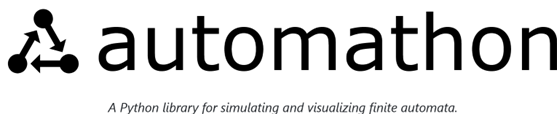

In [1]:
!pip install automathon
!pip install matplotlib

**AFD**

In [2]:
def afd(M, w):
  # 'extrai' os elementos da tupla
  δ, q, F = M

  for s in w:
    q = δ[(q, s)]

  return q in F

In [3]:
# funcao de transicao
δ = {
    ('qd', '0'): 'qd',
    ('qd', '1'): 'qd',
    ('qd', '2'): 'qd',
    ('qd', '3'): 'qd',
    ('qg', '0'): 'qy',
    ('qg', '1'): 'qy',
    ('qg', '2'): 'qd',
    ('qg', '3'): 'qg',
    ('qy', '0'): 'qy',
    ('qy', '1'): 'qd',
    ('qy', '2'): 'qr',
    ('qy', '3'): 'qd',
    ('qr', '0'): 'qy',
    ('qr', '1'): 'qg',
    ('qr', '2'): 'qd',
    ('qr', '3'): 'qr'
}


In [4]:
# AFD representado por uma 3-upla, ao invés de uma 5-upla
# O alfabeto e conjunto de estados podem ser inferidos da funcao de transicao
M = (δ, 'qg', ['qr', 'qy'])

In [5]:
afd(M, "02131023")

True

**AFN**

In [6]:
def E(estados, δ):
    S = set(estados)
    estadosNaoVisitados = list(estados)
    while len(estadosNaoVisitados) > 0:
        q = estadosNaoVisitados.pop()
        if (q, 'ε') in δ:
            diff = δ[(q, 'ε')].difference(S)
            if len(diff) > 0:
                S.update(diff)
                estadosNaoVisitados.extend(diff)

    return S

In [7]:
def afn(M, w):

    """
    Verifica se o AFN M aceita a cadeia w

    Entrada:

        - Um AFN M definido por uma tripla (δ, q0, F), onde
            - δ é um dicionário que mapeia um par (q, s) em um
              conjunto de estados, onde q é um estado e s um símbolo do
              alfabeto
            - q0 é o estado inicial
            - F é o conjunto de estados de finais
        - A cadeia w que será verificada

    Saída:

        True se w pertence a linguagem reconhecida por M
        False caso contrário
    """

    # 'extrai' os elementos da tupla
    δ, q0, F = M

    estadosAtivos = E({q0}, δ)
    for s in w:
        novosEstadosAtivos = set()
        for q in estadosAtivos:
            if (q, s) in δ:
                novosEstadosAtivos.update(E(δ[(q, s)], δ))
        estadosAtivos = novosEstadosAtivos

    return len(estadosAtivos.intersection(F)) != 0

In [8]:
# funcao de transicao do AFN M
δ = {
    ('qg', '0'): 'qy',
    ('qg', '1'): 'qy',
    ('qg', '3'): 'qg',
    ('qy', '0'): 'qy',
    ('qy', '2'): 'qr',
    ('qr', '0'): 'qy',
    ('qr', '1'): 'qg',
    ('qr', '3'): 'qr'
    }

In [9]:
def print_transition_table(transitions):
    print("Tabela de Transição do Autômato:")
    print("Estado Atual | Símbolo de Entrada | Próximos Estados")
    print("-" * 47)
    for (current_state, symbol), next_states in transitions.items():
        next_states_str = ', '.join(sorted(next_states))
        print(f"     {current_state}     |         {symbol}         |       {next_states_str}")
    print("-" * 47)

# Função de transição do AFN M
δ = {
    ('qg', '0'): {'qy'},
    ('qg', '1'): {'qy'},
    ('qg', '3'): {'qg'},
    ('qy', '0'): {'qy'},
    ('qy', '2'): {'qr'},
    ('qr', '0'): {'qy'},
    ('qr', '1'): {'qg'},
    ('qr', '3'): {'qr'}
}

print_transition_table(δ)


Tabela de Transição do Autômato:
Estado Atual | Símbolo de Entrada | Próximos Estados
-----------------------------------------------
     qg     |         0         |       qy
     qg     |         1         |       qy
     qg     |         3         |       qg
     qy     |         0         |       qy
     qy     |         2         |       qr
     qr     |         0         |       qy
     qr     |         1         |       qg
     qr     |         3         |       qr
-----------------------------------------------


In [10]:
# AFN representado por uma 3-upla
M = (δ, 'qg', {'qy', 'qr'})

In [11]:
afn(M, "02131023")

True

In [12]:
#Função que mostra a imagem gerada do automato
import matplotlib.pyplot as plt
def show_image(image, title='',cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show

In [13]:
from automathon import DFA

Q = {'qd', 'qg', 'qr', 'qy'}
sigma = {'0', '1', '2', '3'}
delta = { 'qd' : {'0' : 'qd', '1' : 'qd', '2' : 'qd', '3' : 'qd'},
          'qg' : {'0' : 'qy', '1' : 'qy', '2' : 'qd', '3' : 'qg'},
          'qr' : {'0' : 'qy', '1' : 'qg', '2' : 'qd', '3' : 'qr'},
          'qy' : {'0' : 'qy', '1' : 'qd', '2' : 'qr', '3' : 'qd'}
        }
initial_state = 'qg'
F = {'qr', 'qy'}

automata = DFA(Q, sigma, delta, initial_state, F)

In [14]:
automata.is_valid()

True

In [15]:
automata.accept("001001")

False

In [16]:
automata.accept("02131023")

True

In [17]:
not_automata = automata.complement()
not_automata.accept("02131023")

False

In [18]:
automata_nfa = automata.get_nfa()
automata_nfa.accept("001001")

False

 **`Visualização`**

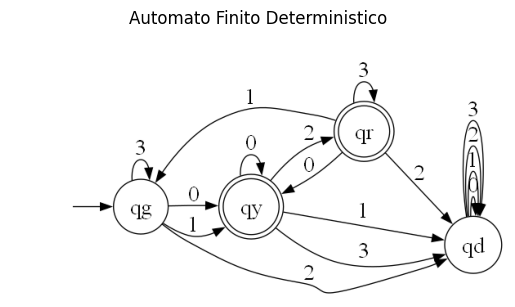

In [19]:
# estilo personalizado
automata.view(
    file_name="afd01_personalizado",
    node_attr={'fontsize': '20'},
    edge_attr={'fontsize': '20pt'}
)
img = plt.imread("afd01_personalizado.gv.png")
show_image(img, "Automato Finito Deterministico")

In [20]:
from automathon import NFA

## Epsilon Transition is denoted by '' -> Empty string
Q = {'qg', 'qr', 'qy'}
sigma = {'0', '1', '2', '3'}
delta = {
    'qg' : {
            '0' : {'qy'}, '1' : {'qy'}, '3' : {'qg'}, '' :  {'qg'}},
    'qr' : {
            '0' : {'qy'}, '1' : {'qg'}, '3' : {'qr'}, '' :  {'qr'}},
    'qy' : {
            '0' : {'qy'}, '2' : {'qr'}, '' :  {'qy'}}
}
initial_state = 'qg'
f = {'qr', 'qy'}

automata = NFA(Q, sigma, delta, initial_state, f)

In [21]:
automata.is_valid()

True

In [22]:
not_automata = automata.complement()
not_automata.accept("")

True

**`Visualização`**

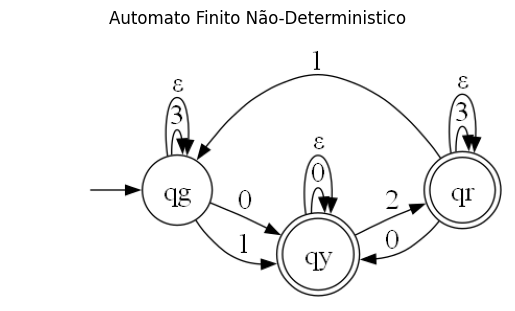

In [23]:
# estilo personalizado
automata.view(
    file_name="afn01_personalizado",
    node_attr={'fontsize': '20'},
    edge_attr={'fontsize': '20pt'}
)
img = plt.imread("afn01_personalizado.gv.png")
show_image(img, "Automato Finito Não-Deterministico")

**`Transições Vazias`**

In [24]:
automata.contains_epsilon_transitions()

True

In [25]:
automata_1 = automata.remove_epsilon_transitions()

print(automata_1.accept("02131023"))
print(automata_1.accept("000001"))

True
False


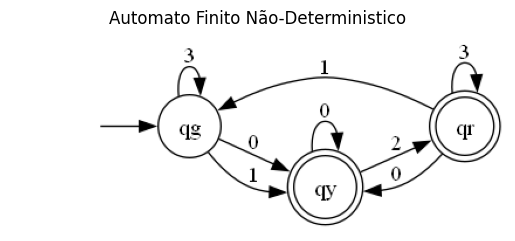

In [26]:
automata_1.view("afn02")
img = plt.imread("afn02.gv.png")
show_image(img, "Automato Finito Não-Deterministico")

**`AFN para AFD`**

In [27]:
automata_3 = automata.get_dfa()

print(automata_3.accept("02131023"))
print(automata_3.accept("032131023"))

True
False


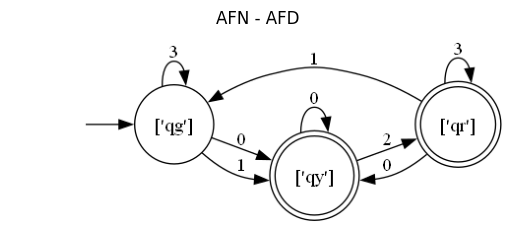

In [28]:
automata_3.view("afn_afd")
img = plt.imread("afn_afd.gv.png")
show_image(img, "AFN - AFD")

In [29]:
automata_4 = automata_3.get_nfa()

print(automata_4.accept("0000011"))
print(automata_4.accept("000001"))

False
False


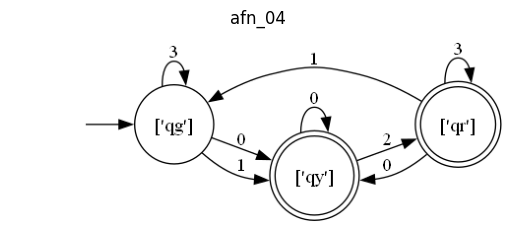

In [30]:
automata_4.view("afn_04")
img = plt.imread("afn_04.gv.png")
show_image(img, "afn_04")

In [31]:
automata_4.renumber()

print(automata_4.accept("02131023"))
print(automata_4.accept("000001"))

True
False


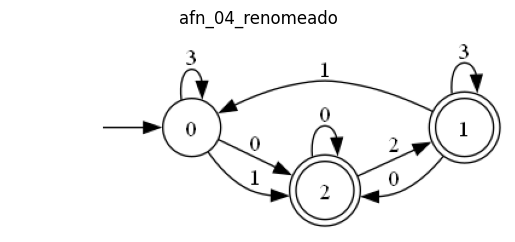

In [32]:
automata_4.view("afn_04_renomeado")
img = plt.imread("afn_04_renomeado.gv.png")
show_image(img, "afn_04_renomeado")

**`Minimização`**

In [33]:
automata_2 = automata.minimize()

print(automata_2.accept("0000011"))
print(automata_2.accept("000001"))

False
False


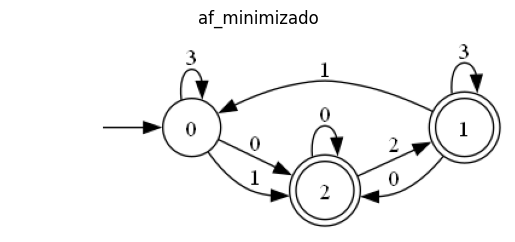

In [34]:
automata_2.view("af_minimizado")
img = plt.imread("af_minimizado.gv.png")
show_image(img, "af_minimizado")

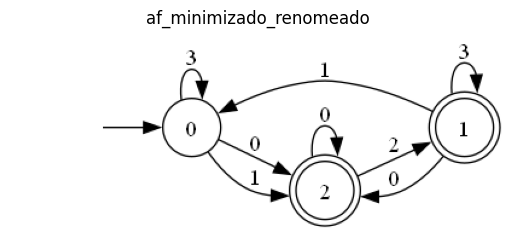

In [35]:
automata_2.view("af_minimizado_renomeado")
img = plt.imread("af_minimizado_renomeado.gv.png")
show_image(img, "af_minimizado_renomeado")

**Referências:**

https://github.com/rohaquinlop/automathon

https://rohaquinlop.github.io/automathon/

https://matplotlib.org/stable/